In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_excel("/content/gdrive/My Drive/Price_Drop.xlsx")
data.head()

,building_id,name,unit_number,beds,baths,sqft,neighborhood_name,concession_title,updated_on,old_price,new_price,max_price,net_price,price_per_sqft,percentage_change,cooperate,concession_applied
0,1,1000 South Clark,2507,1,1.0,730,South Loop,1 Month Off Available on all unit types for a ...,2020-07-23 16:47:51.661,2268,2313,2918,2159,2.957,-0.260110,True,True
1,1,1000 South Clark,1615,1,1.0,765,South Loop,1 Month Off Available on all unit types for a ...,2020-08-01 19:46:25.883,2419,2467,2918,2303,3.010,-0.210761,True,True
2,1,1000 South Clark,1806,1,1.0,645,South Loop,1 Month Off Available on all unit types for a ...,2020-08-05 11:30:16.886,2158,2201,2918,2054,3.185,-0.296093,True,True
3,1,1000 South Clark,2717,1,1.0,710,South Loop,1 Month Off Available on all unit types for a ...,2020-08-01 11:33:52.353,2178,2181,2918,2036,2.867,-0.302262,True,True
4,1,1000 South Clark,1817,1,1.0,710,South Loop,1 Month Off Available on all unit types for a ...,2020-08-01 11:33:52.353,2088,2091,2918,1952,2.749,-0.331049,True,True


In [ ]:
df = data.copy()
df

,building_id,name,unit_number,beds,baths,sqft,neighborhood_name,concession_title,updated_on,old_price,new_price,max_price,net_price,price_per_sqft,percentage_change,cooperate,concession_applied
0,1,1000 South Clark,2507,1,1.0,730,South Loop,1 Month Off Available on all unit types for a ...,2020-07-23 16:47:51.661,2268,2313,2918,2159,2.957,-0.260110,True,True
1,1,1000 South Clark,1615,1,1.0,765,South Loop,1 Month Off Available on all unit types for a ...,2020-08-01 19:46:25.883,2419,2467,2918,2303,3.010,-0.210761,True,True
2,1,1000 South Clark,1806,1,1.0,645,South Loop,1 Month Off Available on all unit types for a ...,2020-08-05 11:30:16.886,2158,2201,2918,2054,3.185,-0.296093,True,True
3,1,1000 South Clark,2717,1,1.0,710,South Loop,1 Month Off Available on all unit types for a ...,2020-08-01 11:33:52.353,2178,2181,2918,2036,2.867,-0.302262,True,True
4,1,1000 South Clark,1817,1,1.0,710,South Loop,1 Month Off Available on all unit types for a ...,2020-08-01 11:33:52.353,2088,2091,2918,1952,2.749,-0.331049,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3486,6378,The Bernardin,801,2,2.0,1405,River North,Currently offering 1.5 months free if move in ...,2020-08-12 10:17:13.839,3289,3275,3830,2948,2.098,-0.230287,True,True
3487,6378,The Bernardin,2201,2,2.0,1399,River North,Currently offering 1.5 months free if move in ...,2020-08-12 10:17:09.411,3622,3606,3830,3245,2.320,-0.152742,True,True
3488,6378,The Bernardin,2204,2,2.0,1244,River North,Currently offering 1.5 months free if move in ...,2020-08-12 10:17:13.488,3375,3361,3830,3025,2.432,-0.210183,True,True
3489,6378,The Bernardin,2306,2,2.0,1174,River North,Currently offering 1.5 months free if move in ...,2020-08-12 10:17:21.474,3409,3396,3830,3056,2.603,-0.202089,True,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3491 entries, 0 to 3490
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   building_id         3491 non-null   int64         
 1   name                3491 non-null   object        
 2   unit_number         3491 non-null   object        
 3   beds                3491 non-null   int64         
 4   baths               3491 non-null   float64       
 5   sqft                3491 non-null   int64         
 6   neighborhood_name   3467 non-null   object        
 7   concession_title    2586 non-null   object        
 8   updated_on          3491 non-null   datetime64[ns]
 9   old_price           3491 non-null   int64         
 10  new_price           3491 non-null   int64         
 11  max_price           3491 non-null   int64         
 12  net_price           3491 non-null   int64         
 13  price_per_sqft      3491 non-null   float64     

In [ ]:
# There can be multiple descriptions a client wants
# These are number of beds and baths, sqft, neighborhood, net_price, price per sqft.
# Another can be concession applied

In [ ]:
# Suppose a basic need for client's family is 2 beds and 2 baths at a cheap rate
# Filtering for 2 beds and two baths with some concession

In [ ]:
df = df.loc[(df["beds"]==2) & (df["baths"]==2) & df["concession_applied"]==True]
df

,building_id,name,unit_number,beds,baths,sqft,neighborhood_name,concession_title,updated_on,old_price,new_price,max_price,net_price,price_per_sqft,percentage_change,cooperate,concession_applied
39,1,1000 South Clark,1214,2,2.0,1083,South Loop,1 Month Off Available on all unit types for a ...,2020-08-12 11:38:20.535,3297,3303,3543,3083,2.847,-0.129833,True,True
40,1,1000 South Clark,805,2,2.0,1083,South Loop,1 Month Off Available on all unit types for a ...,2020-08-12 11:38:20.535,3122,3128,3543,2919,2.696,-0.176122,True,True
41,1,1000 South Clark,514,2,2.0,1083,South Loop,1 Month Off Available on all unit types for a ...,2020-08-12 11:38:20.535,3128,3134,3543,2925,2.701,-0.174428,True,True
42,1,1000 South Clark,1405,2,2.0,1083,South Loop,1 Month Off Available on all unit types for a ...,2020-08-12 11:38:20.535,3212,3218,3543,3003,2.773,-0.152413,True,True
43,1,1000 South Clark,1705,2,2.0,1083,South Loop,1 Month Off Available on all unit types for a ...,2020-08-12 11:38:20.535,3322,3328,3543,3106,2.868,-0.123342,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3486,6378,The Bernardin,801,2,2.0,1405,River North,Currently offering 1.5 months free if move in ...,2020-08-12 10:17:13.839,3289,3275,3830,2948,2.098,-0.230287,True,True
3487,6378,The Bernardin,2201,2,2.0,1399,River North,Currently offering 1.5 months free if move in ...,2020-08-12 10:17:09.411,3622,3606,3830,3245,2.320,-0.152742,True,True
3488,6378,The Bernardin,2204,2,2.0,1244,River North,Currently offering 1.5 months free if move in ...,2020-08-12 10:17:13.488,3375,3361,3830,3025,2.432,-0.210183,True,True
3489,6378,The Bernardin,2306,2,2.0,1174,River North,Currently offering 1.5 months free if move in ...,2020-08-12 10:17:21.474,3409,3396,3830,3056,2.603,-0.202089,True,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 279 entries, 39 to 3490
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   building_id         279 non-null    int64         
 1   name                279 non-null    object        
 2   unit_number         279 non-null    object        
 3   beds                279 non-null    int64         
 4   baths               279 non-null    float64       
 5   sqft                279 non-null    int64         
 6   neighborhood_name   279 non-null    object        
 7   concession_title    237 non-null    object        
 8   updated_on          279 non-null    datetime64[ns]
 9   old_price           279 non-null    int64         
 10  new_price           279 non-null    int64         
 11  max_price           279 non-null    int64         
 12  net_price           279 non-null    int64         
 13  price_per_sqft      279 non-null    float64       
 1

In [ ]:
df.describe()

,building_id,beds,baths,sqft,updated_on,old_price,new_price,max_price,net_price,price_per_sqft,percentage_change
count,279.000000,279.0,279.0,279.000000,279,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000
mean,1007.089606,2.0,2.0,1156.200717,2020-08-02 04:48:10.458211584,3358.713262,3371.412186,4050.874552,3076.727599,2.658405,-0.202401
min,1.000000,2.0,2.0,800.000000,2020-03-31 00:45:48.030000,2045.000000,2035.000000,2375.000000,1899.000000,1.631000,-0.703455
25%,34.000000,2.0,2.0,1080.000000,2020-07-28 20:22:48.415000064,2877.500000,2858.500000,3166.000000,2631.000000,2.266000,-0.240027
50%,92.000000,2.0,2.0,1151.000000,2020-08-07 15:01:52.500000,3322.000000,3355.000000,3680.000000,3066.000000,2.605000,-0.176122
75%,203.000000,2.0,2.0,1226.000000,2020-08-12 10:17:16.586500096,3715.000000,3708.500000,4157.000000,3343.000000,2.953000,-0.133172
max,6378.000000,2.0,2.0,1950.000000,2020-08-12 19:21:59.631000,11000.000000,9500.000000,11000.000000,8867.000000,5.185000,-0.008119
std,2124.797420,0.0,0.0,136.035580,NaN,844.965410,815.644344,1701.679334,750.371393,0.515952,0.125298


In [ ]:
# As the client requires cheap prices, grouping the net price based on neighborhood

<BarContainer object of 279 artists>

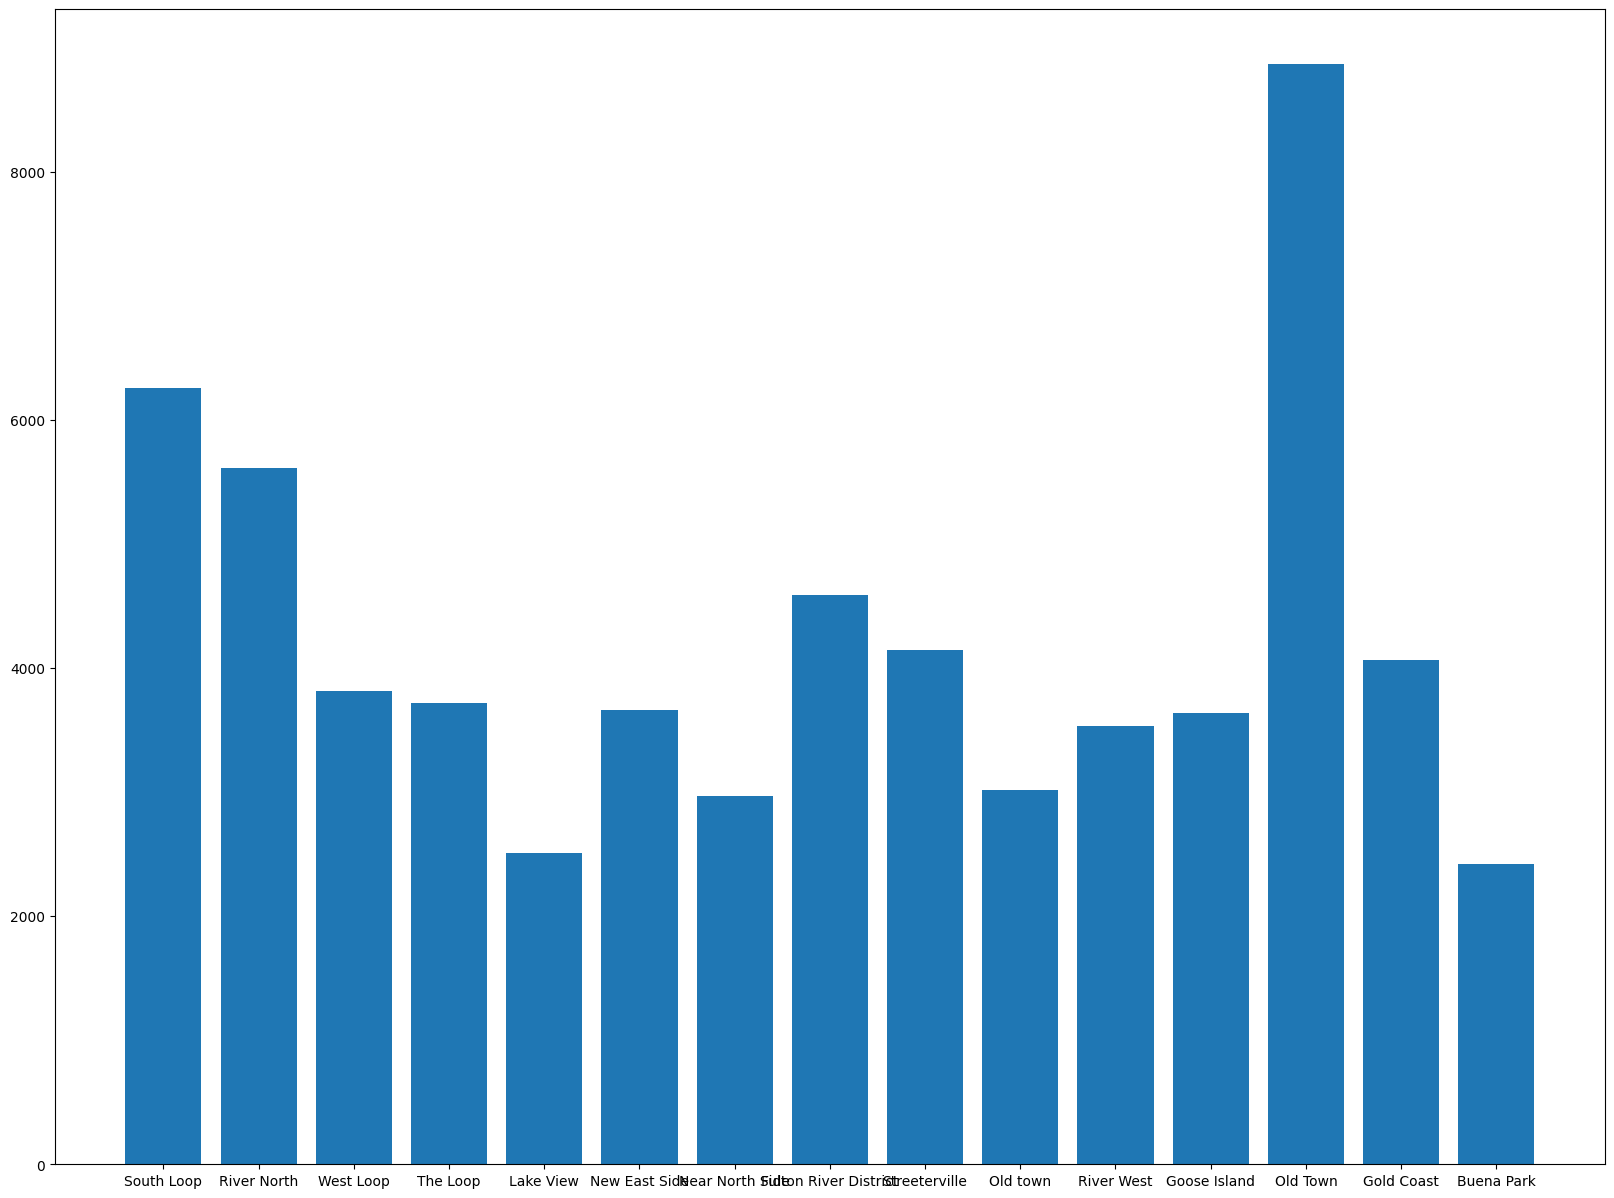

In [ ]:
plt.figure(figsize = (20,15))
plt.bar(df["neighborhood_name"], df["net_price"])


In [ ]:
# From the plot we can see that, the highest is of Old Town, but has typo mistake. Changing Old town to Old Town

In [ ]:
df['neighborhood_name'] = df['neighborhood_name'].apply(lambda x: "Old Town" if x == 'Old town' else x)
df

<ipython-input-83-ea6af6609d4a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['neighborhood_name'] = df['neighborhood_name'].apply(lambda x: "Old Town" if x == 'Old town' else x)


,building_id,name,unit_number,beds,baths,sqft,neighborhood_name,concession_title,updated_on,old_price,new_price,max_price,net_price,price_per_sqft,percentage_change,cooperate,concession_applied
39,1,1000 South Clark,1214,2,2.0,1083,South Loop,1 Month Off Available on all unit types for a ...,2020-08-12 11:38:20.535,3297,3303,3543,3083,2.847,-0.129833,True,True
40,1,1000 South Clark,805,2,2.0,1083,South Loop,1 Month Off Available on all unit types for a ...,2020-08-12 11:38:20.535,3122,3128,3543,2919,2.696,-0.176122,True,True
41,1,1000 South Clark,514,2,2.0,1083,South Loop,1 Month Off Available on all unit types for a ...,2020-08-12 11:38:20.535,3128,3134,3543,2925,2.701,-0.174428,True,True
42,1,1000 South Clark,1405,2,2.0,1083,South Loop,1 Month Off Available on all unit types for a ...,2020-08-12 11:38:20.535,3212,3218,3543,3003,2.773,-0.152413,True,True
43,1,1000 South Clark,1705,2,2.0,1083,South Loop,1 Month Off Available on all unit types for a ...,2020-08-12 11:38:20.535,3322,3328,3543,3106,2.868,-0.123342,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3486,6378,The Bernardin,801,2,2.0,1405,River North,Currently offering 1.5 months free if move in ...,2020-08-12 10:17:13.839,3289,3275,3830,2948,2.098,-0.230287,True,True
3487,6378,The Bernardin,2201,2,2.0,1399,River North,Currently offering 1.5 months free if move in ...,2020-08-12 10:17:09.411,3622,3606,3830,3245,2.320,-0.152742,True,True
3488,6378,The Bernardin,2204,2,2.0,1244,River North,Currently offering 1.5 months free if move in ...,2020-08-12 10:17:13.488,3375,3361,3830,3025,2.432,-0.210183,True,True
3489,6378,The Bernardin,2306,2,2.0,1174,River North,Currently offering 1.5 months free if move in ...,2020-08-12 10:17:21.474,3409,3396,3830,3056,2.603,-0.202089,True,True


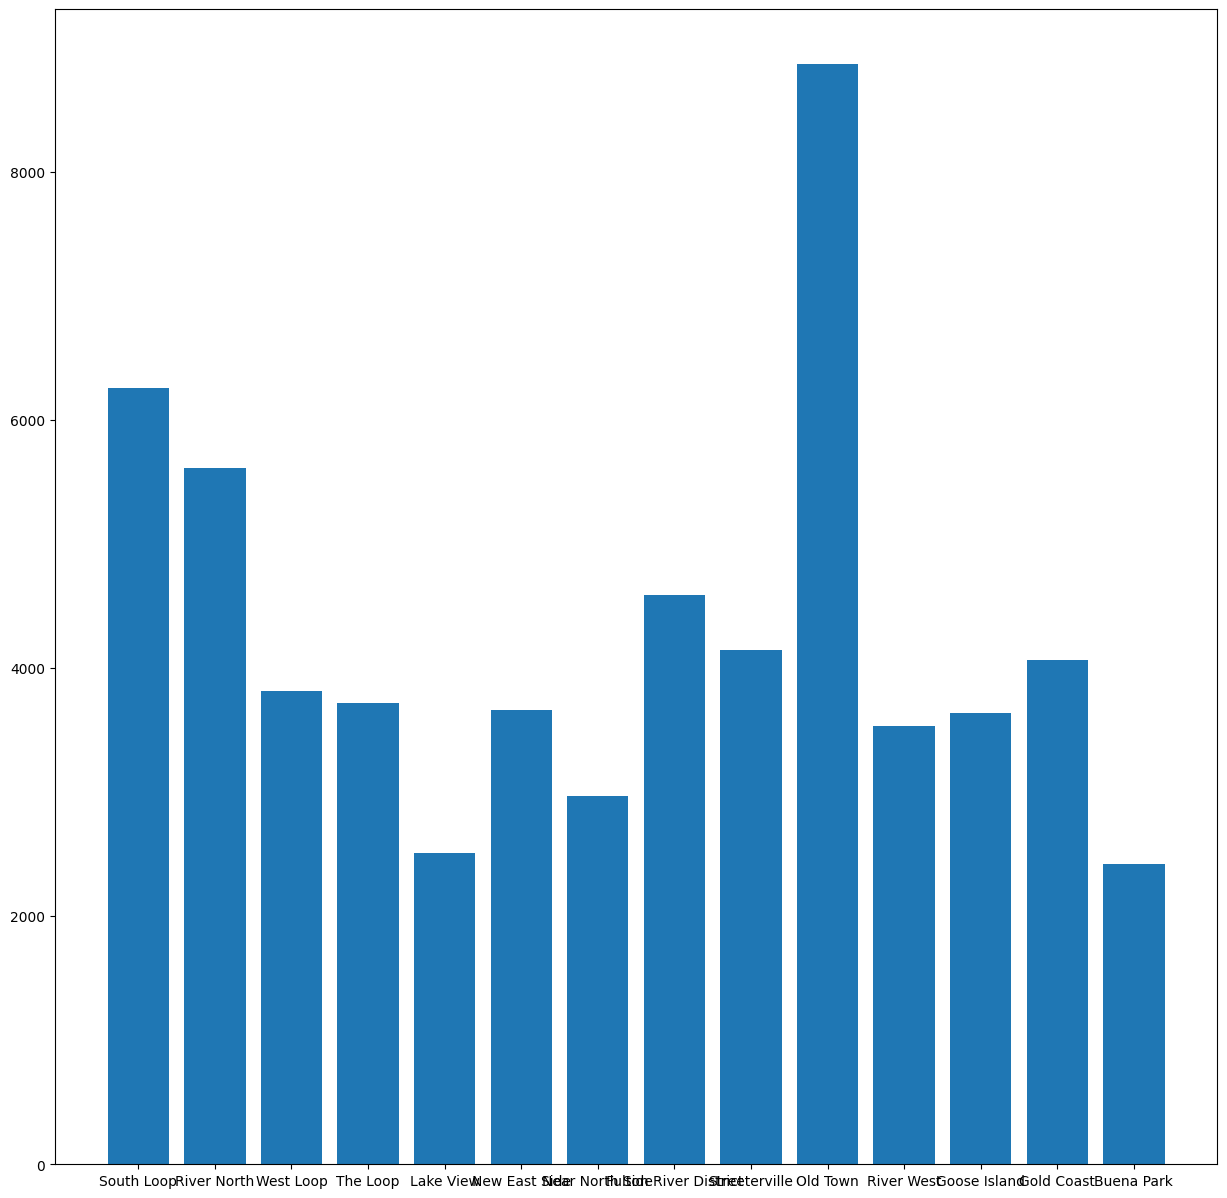

In [ ]:
plt.figure(figsize = (15,15))
plt.bar(df["neighborhood_name"], df["net_price"])
plt.savefig("/content/gdrive/My Drive/neighborhood_netprice.png")

In [ ]:
# We can see that Old Town has the highest price while Lake View and Buena Park have the lowest prices.
# We can see the statistics based on mean

In [ ]:
neighborhood_agg = df.groupby(['neighborhood_name']).agg({'net_price': 'mean'}).reset_index()
neighborhood_agg

,neighborhood_name,net_price
0,Buena Park,2422.000000
1,Fulton River District,3363.375000
2,Gold Coast,3864.500000
3,Goose Island,3641.000000
4,Lake View,2252.750000
5,Near North Side,2968.000000
6,New East Side,2931.153846
7,Old Town,3529.047619
8,River North,3115.264706
9,River West,3276.500000


In [ ]:
df

,building_id,name,unit_number,beds,baths,sqft,neighborhood_name,concession_title,updated_on,old_price,new_price,max_price,net_price,price_per_sqft,percentage_change,cooperate,concession_applied
39,1,1000 South Clark,1214,2,2.0,1083,South Loop,1 Month Off Available on all unit types for a ...,2020-08-12 11:38:20.535,3297,3303,3543,3083,2.847,-0.129833,True,True
40,1,1000 South Clark,805,2,2.0,1083,South Loop,1 Month Off Available on all unit types for a ...,2020-08-12 11:38:20.535,3122,3128,3543,2919,2.696,-0.176122,True,True
41,1,1000 South Clark,514,2,2.0,1083,South Loop,1 Month Off Available on all unit types for a ...,2020-08-12 11:38:20.535,3128,3134,3543,2925,2.701,-0.174428,True,True
42,1,1000 South Clark,1405,2,2.0,1083,South Loop,1 Month Off Available on all unit types for a ...,2020-08-12 11:38:20.535,3212,3218,3543,3003,2.773,-0.152413,True,True
43,1,1000 South Clark,1705,2,2.0,1083,South Loop,1 Month Off Available on all unit types for a ...,2020-08-12 11:38:20.535,3322,3328,3543,3106,2.868,-0.123342,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3486,6378,The Bernardin,801,2,2.0,1405,River North,Currently offering 1.5 months free if move in ...,2020-08-12 10:17:13.839,3289,3275,3830,2948,2.098,-0.230287,True,True
3487,6378,The Bernardin,2201,2,2.0,1399,River North,Currently offering 1.5 months free if move in ...,2020-08-12 10:17:09.411,3622,3606,3830,3245,2.320,-0.152742,True,True
3488,6378,The Bernardin,2204,2,2.0,1244,River North,Currently offering 1.5 months free if move in ...,2020-08-12 10:17:13.488,3375,3361,3830,3025,2.432,-0.210183,True,True
3489,6378,The Bernardin,2306,2,2.0,1174,River North,Currently offering 1.5 months free if move in ...,2020-08-12 10:17:21.474,3409,3396,3830,3056,2.603,-0.202089,True,True


In [ ]:
# We can see that LakeView has a net_price of $2253 and Buena Park has $2422.
# So, we can target LakeView and Buena Park for cheap rates because there is not a greater difference between these two.

In [ ]:
# So, filtering the df for these two neighborhoods

In [ ]:
df = df.loc[(df["neighborhood_name"]=="Lake View") | (df["neighborhood_name"]=="Buena Park")]
df

,building_id,name,unit_number,beds,baths,sqft,neighborhood_name,concession_title,updated_on,old_price,new_price,max_price,net_price,price_per_sqft,percentage_change,cooperate,concession_applied
703,123,The Bryn,3AR,2,2.0,1250,Lake View,1 Month Free with Move-in by 2/29,2020-08-05 14:13:40.714,2500,2685,2685,2506,2.005,-0.066667,True,True
704,123,The Bryn,7BR,2,2.0,1050,Lake View,1 Month Free with Move-in by 2/29,2020-08-03 17:15:19.571,2150,2405,2685,2245,2.138,-0.163873,True,True
705,123,The Bryn,5BR,2,2.0,1050,Lake View,1 Month Free with Move-in by 2/29,2020-07-26 14:24:46.135,2100,2395,2685,2235,2.129,-0.167598,True,True
706,123,The Bryn,16GR,2,2.0,800,Lake View,1 Month Free with Move-in by 2/29,2020-07-30 13:48:36.676,2150,2170,2685,2025,2.532,-0.245810,True,True
2912,3634,Stewart School Lofts,406,2,2.0,1485,Buena Park,2 months free on 14 month leases for move-ins ...,2020-07-29 17:25:06.186,2990,2795,3700,2422,1.631,-0.345405,True,True


In [ ]:
# So, 5 houses are shortlisted. 4 of them are in "The Bryn" and one is in "Stewart School Lofts" among which the cheapest is the unit number
# 16GR. But we can give 5 choices to choose from.

In [ ]:
# Please note that client's demands can be different for which results are different.
# These results are generated for 2 beds, 2 baths appartment with cheapest price.